In [2]:
%load_ext autoreload
%autoreload 2

In [278]:
import sys
sys.path.insert(0, '/home/xhding/workspaces/torch-deep-retina')
import os
import scipy
import h5py
import numpy as np
import matplotlib.pyplot as plt
import torch
import pyret
from kinetic.evaluation import *
from kinetic.utils import *
from kinetic.config import get_custom_cfg
from kinetic.data import *
from kinetic.notebook.functions import *

In [216]:
with h5py.File('/home/xhding/tem_stim/20-09-15/fullfield_whitenoise.h5', 'r') as f:
    stimulus =  np.asarray(f['test']['stimulus'][:, 25, 25]).astype('float32')
    resp = np.asarray(f['test']['response']['firing_rate_10ms'][0])

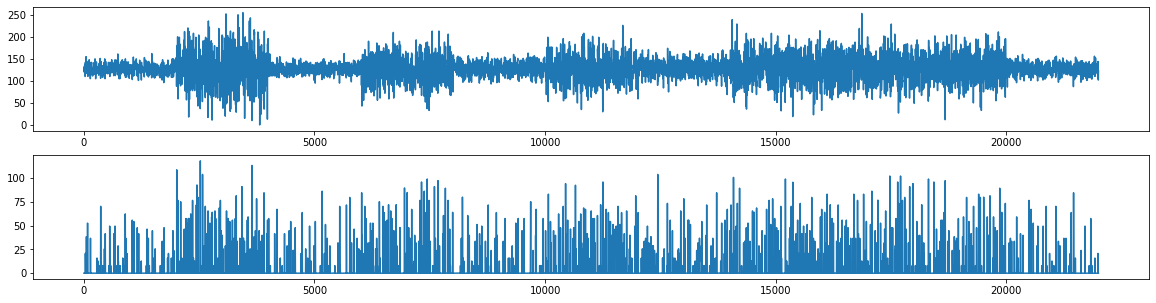

In [43]:
fig,ax = plt.subplots(2,1,figsize=(20,5))
ax[0].plot(stimulus)
ax[1].plot(resp)

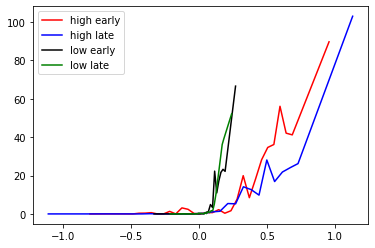

In [281]:
he, hl, le, ll = contrast_adaption_nonlinear(stimulus, resp, h_start=2000, l_start=4000)

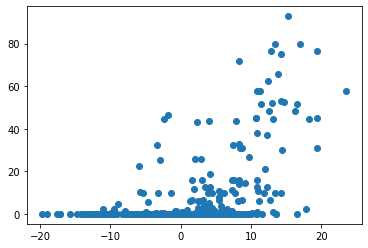

In [223]:
plt.plot(filtered_stim[filter_len:], resp_he[filter_len:], 'o')

In [252]:
device = torch.device('cuda:3')
cfg = get_custom_cfg('LNK')
model = select_model(cfg, device)
checkpoint_path = '/home/xhding/saved_model/LNK/epoch_045_loss_1.40_pearson_0.5228.pth'
checkpoint = torch.load(checkpoint_path, map_location=device)
checkpoint['model_state_dict']['bias']=torch.tensor([-8.6525], device='cuda:3')
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

LNK(
  (ln_filter): Temperal_Filter()
  (nonlinear): Sigmoid()
  (kinetics): Kinetics()
  (scale_shift): Linear(in_features=1, out_features=1, bias=True)
  (spiking): Softplus(beta=1, threshold=20)
)

In [271]:
test_data =  DataLoader(TestDatasetOnePixel(cfg, TrainDataset(cfg).stats), batch_size=1)
test_pc, pred, _ = pearsonr_eval_LNK_with_responses(model, test_data, 1, device)
pred = np.pad(pred[:, 0], (100, 0), 'constant', constant_values=(0,0))

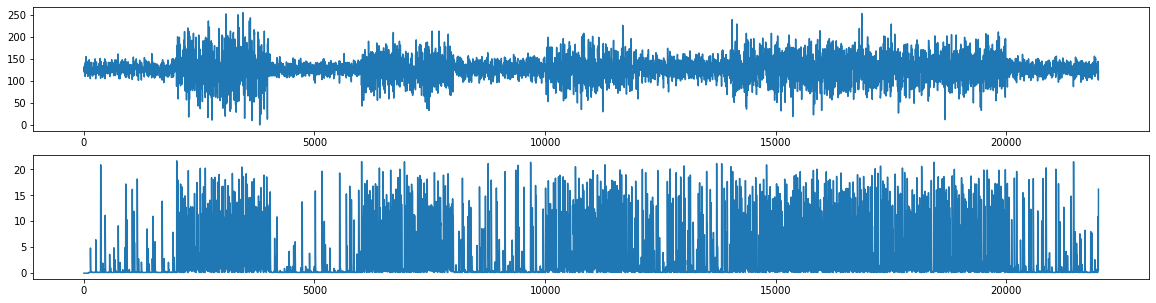

In [275]:
fig,ax = plt.subplots(2,1,figsize=(20,5))
ax[0].plot(stimulus)
ax[1].plot(pred)

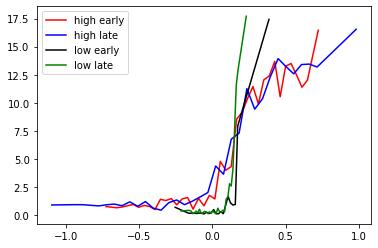

In [280]:
he, hl, le, ll = contrast_adaption_nonlinear(stimulus, pred, h_start=2000, l_start=4000)